## Milestone 2

- Feature Engineering
- Feature Selection
- Data Modelling

In [38]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
full_df = pd.read_csv('data/full_df.csv')

print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106556 entries, 0 to 106555
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       106556 non-null  object 
 1   customer_id                    106556 non-null  object 
 2   order_status                   106556 non-null  object 
 3   order_purchase_timestamp       106556 non-null  object 
 4   order_approved_at              106556 non-null  object 
 5   order_delivered_carrier_date   105791 non-null  object 
 6   order_delivered_customer_date  104683 non-null  object 
 7   order_estimated_delivery_date  106556 non-null  object 
 8   delivery_time                  104683 non-null  float64
 9   delivery_difference            104683 non-null  float64
 10  review_id                      106556 non-null  object 
 11  review_score                   106556 non-null  int64  
 12  review_comment_title          

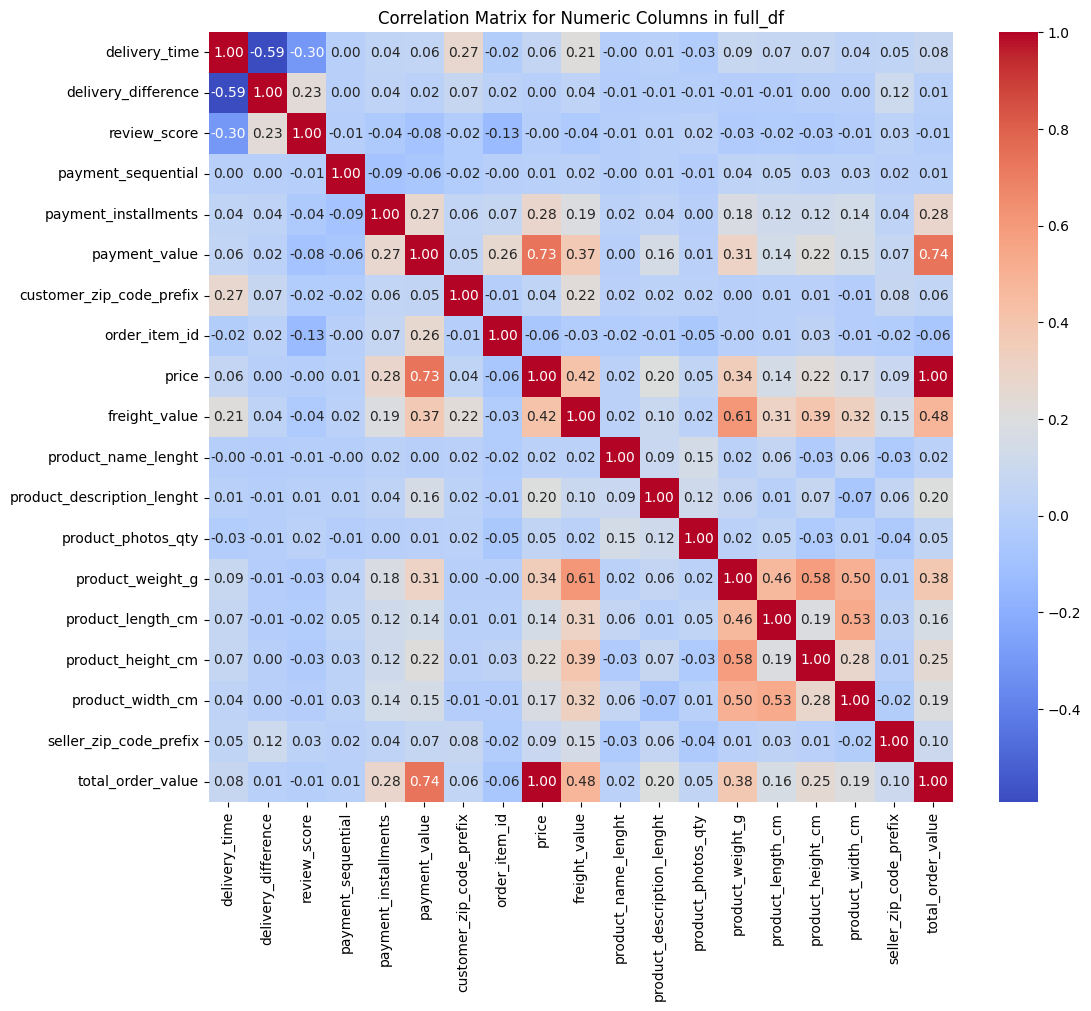

In [43]:
# Select only numeric columns from full_df
numeric_columns = full_df.select_dtypes(include=['number'])

# Compute the correlation matrix and display values in the heatmap
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Numeric Columns in full_df')
plt.show()

In [44]:
# Flatten the correlation matrix and reset the index
correlation_pairs = updated_correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations and duplicate pairs
correlation_pairs = correlation_pairs[correlation_pairs['Feature1'] != correlation_pairs['Feature2']]
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Correlation'])

# Sort by absolute correlation values in descending order
top_correlations = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Display the top correlating pairs
print(top_correlations.head(10))

               Feature1                Feature2  Correlation
210               price       total_order_value     0.997104
68         review_score  review_sentiment_score     0.983326
334    product_weight_g          product_volume     0.802523
91   payment_sequential  customer_loyalty_score     0.764023
138       payment_value       total_order_value     0.737647
128       payment_value                   price     0.734052
382   product_height_cm          product_volume     0.723089
143       payment_value   order_value_deviation    -0.709953
406    product_width_cm          product_volume     0.623246
229       freight_value        product_weight_g     0.612561
